In [74]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
g = gen_BA_graph(1000, 3)

In [3]:
run_SIS_simulation(g, 0.3, time_steps=500)
run_SIS_simulation(g, 0.3, time_steps=1000)
run_SIS_simulation(g, 0.3, time_steps=2000)

array([ 0.5  ,  0.149,  0.106, ...,  0.161,  0.167,  0.146])

In [5]:
for lam in np.linspace(0, 1, 5):
    print(run_SIS_simulation(g, 0.1))

0.0
0.0
0.0
0.0
0.0


In [ ]:
g = gen_BA_graph(100000, 3)
data = run_SIS_simulation(g, .05, rho_0=0.1, time_steps=50)
plot_all_time_steps(data)

In [70]:
lambdas_plan = {
    1e5 : np.linspace(1/12, 1/8, 5),
    5e5 : np.linspace(1/15, 1/10, 3),
    1e6 : np.linspace(1/17, 1/12, 2),
    5e6 : np.linspace(1/18, 1/15, 2),
#     8.5e6 : np.linspace(1/20, 1/19, 2),
    8.5e6 : [1/20]
}

data = {}
for size in lambdas_plan.keys():
    print('starting size: ', size)
    for lam in lambdas_plan[size]:
        print('starting lamda: ', lam)
        data[(size, lam)] = []
        for trial in range(10):
            print('t', trial)
            data[(size, lam)].append(run_SIS_simulation(g, lam, time_steps=20)[-1])
        data[(size, lam)] = np.mean(data[(size, lam)])

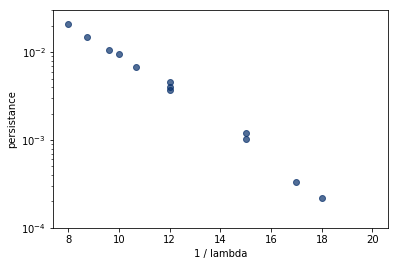

In [75]:
data
keys = data.keys()

for key in keys:
    xs = [1/k[1] for k in keys]
    ys = [data[key] for key in keys]
thinkplot.plot(xs, ys, style='o')
thinkplot.config(ylim=[1e-4, 3e-2], yscale='log', xlabel='1 / lambda', ylabel='persistance')
plt.savefig('different_name.pdf')